<a href="https://colab.research.google.com/github/odarasimi/Kaggle_DekhoVehiclePrices/blob/main/Kaggle_CarDekhoVehicle_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
! pip install ppscore
import ppscore as pps

In [ ]:
from google.colab import files
car_data = files.upload()

In [ ]:
from google.colab import files
car_details = files.upload()

In [5]:
df = pd.read_csv("car data.csv")

In [6]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
df_list = []
for item in np.array(df.columns):
  df_list.append(item)
df_list

['Car_Name',
 'Year',
 'Selling_Price',
 'Present_Price',
 'Kms_Driven',
 'Fuel_Type',
 'Seller_Type',
 'Transmission',
 'Owner']

In [10]:
print (df["Car_Name"].value_counts())
print (df["Transmission"].value_counts())
print (df["Owner"].value_counts())
print (df["Seller_Type"].value_counts())
print (df["Fuel_Type"].value_counts())

city                      26
corolla altis             16
verna                     14
fortuner                  11
brio                      10
                          ..
Hero Honda CBZ extreme     1
UM Renegade Mojave         1
Hero Glamour               1
TVS Jupyter                1
baleno                     1
Name: Car_Name, Length: 98, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64
0    290
1     10
3      1
Name: Owner, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


**PPS**

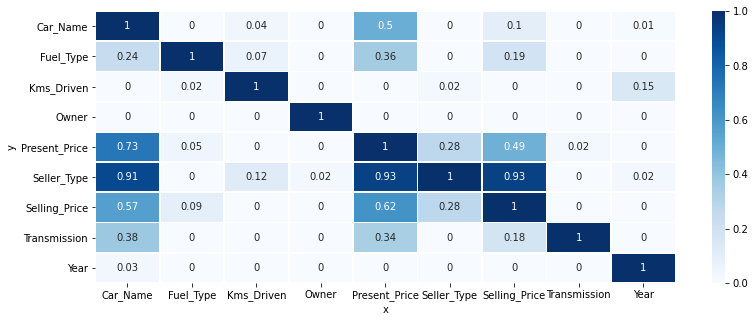

In [11]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
fig = plt.figure(figsize=(13,5))
matrix_df = pps.matrix(df)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
matrix_df = matrix_df.apply(lambda x: round(x, 2)) 
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.75, annot=True)

**Correlation**

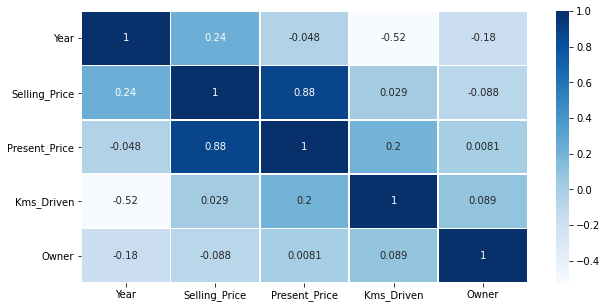

In [91]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,5))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="Blues", linewidths=0.75)

In [12]:
def snip(item):
  snip = item.split(" ")[0]
  return snip

In [13]:
df2 = df[df_list]
df2["Car_Name"] = df2["Car_Name"].apply(lambda x: snip(x))

In [14]:
df2.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


**Comparing selling prices to year**

AxesSubplot(0.125,0.125;0.775x0.755)


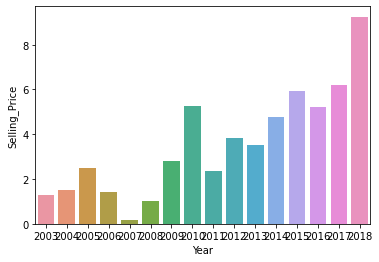

In [35]:
sns.barplot(x="Year", y="Selling_Price", ci=None,data=df2)

**Comparing Selliing prices to Transmission**

AxesSubplot(0.125,0.125;0.775x0.755)


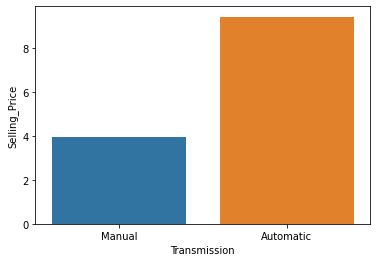

In [36]:
print (sns.barplot(x="Transmission", y="Selling_Price", ci=None,data=df2))

**Comparing Car_names to selling prices based on fuel type**

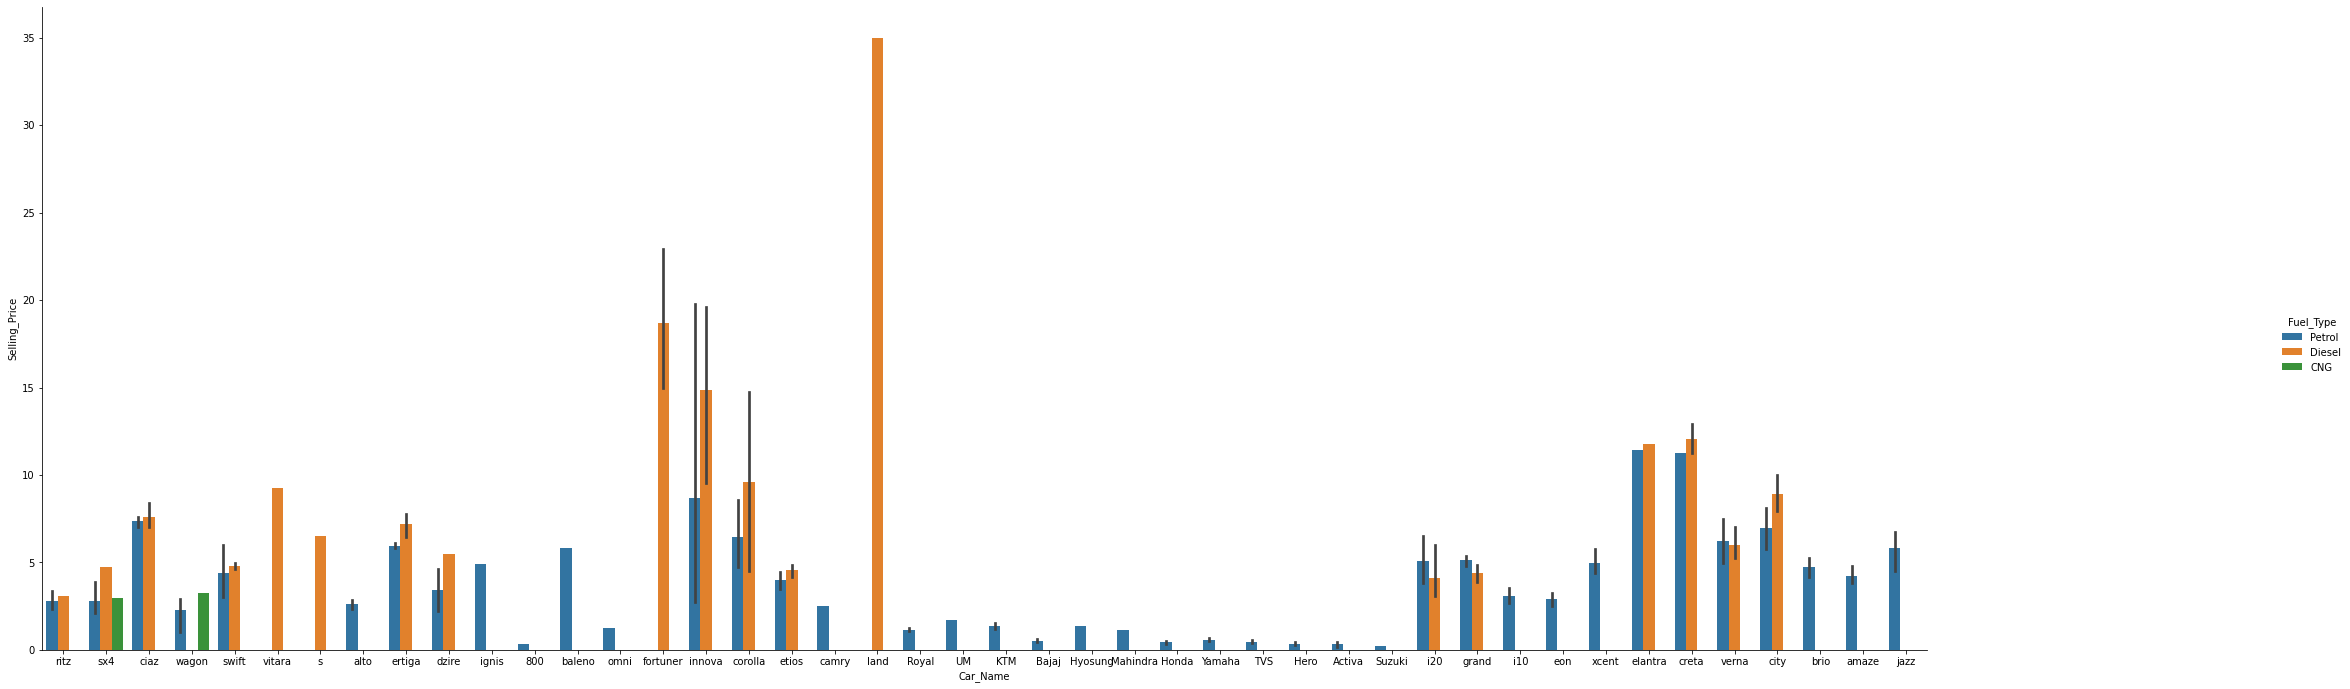

In [32]:
g=sns.catplot(x="Car_Name", y="Selling_Price", hue="Fuel_Type", kind="bar", data=df2)
g.fig.set_figwidth(35)
g.fig.set_figheight(10)

**Visualising outliers in selling price and present price**

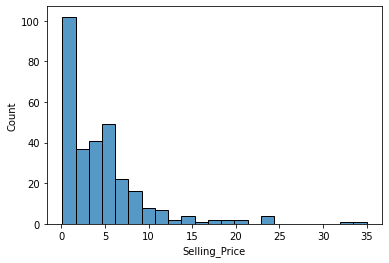

In [41]:
sns.histplot(df2.Selling_Price)

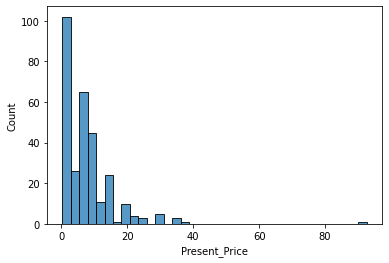

In [44]:
sns.histplot(df2.Present_Price)

In [15]:
df2["Car_Age"] = 2020 - df["Year"]

In [16]:
df3 = df2.drop(["Year"],axis=1)

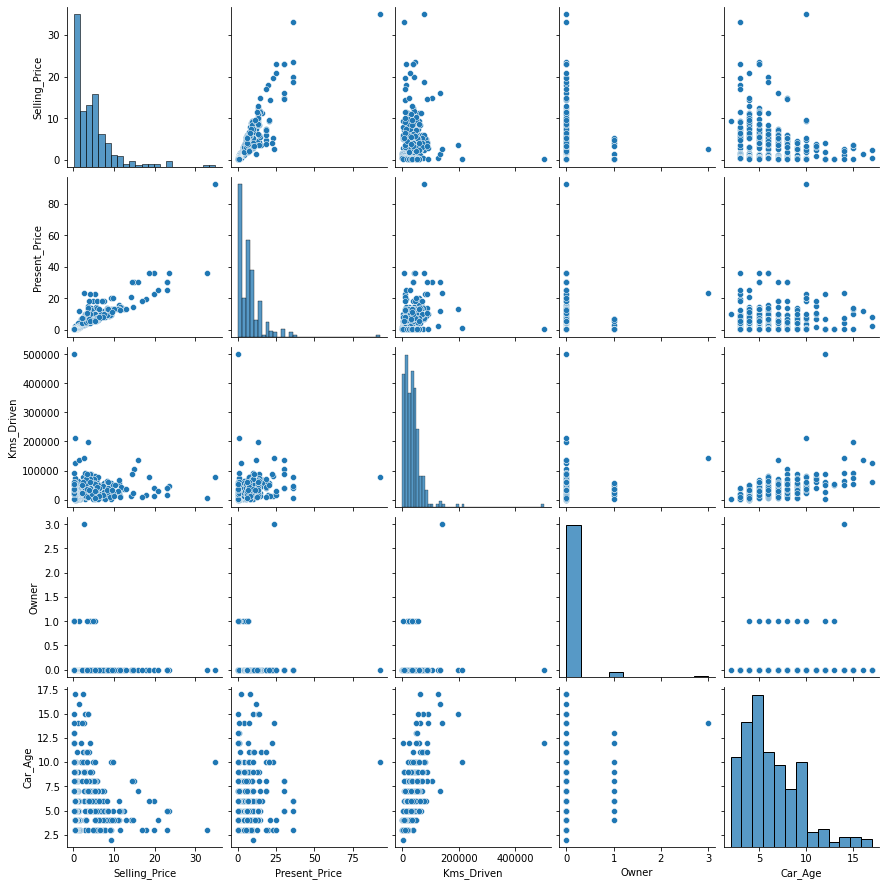

In [17]:
sns.pairplot(df3)

In [108]:
dumm = pd.get_dummies(df3.Fuel_Type,prefix="Fuel_Type")
dummy = pd.get_dummies(df3.Seller_Type,prefix="Seller_Type")
dummyy = pd.get_dummies(df3.Transmission,prefix="Transmission")
df4 = pd.concat([df3,dumm,dummy,dummyy],axis=1)
df4.drop(["Fuel_Type","Seller_Type","Transmission"],axis=1,inplace=True)

In [109]:
df4.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,ritz,3.35,5.59,27000,0,6,0,0,1,1,0,0,1
1,sx4,4.75,9.54,43000,0,7,0,1,0,1,0,0,1
2,ciaz,7.25,9.85,6900,0,3,0,0,1,1,0,0,1
3,wagon,2.85,4.15,5200,0,9,0,0,1,1,0,0,1
4,swift,4.60,6.87,42450,0,6,0,1,0,1,0,0,1


In [110]:
st1 = np.std(df4.Selling_Price)
mean1 = np.mean(df4.Selling_Price)
st2 = np.std(df4.Present_Price)
mean2 = np.mean(df4.Present_Price)

In [111]:
def snip(value,means,st):
  threshold1 = 1
  threshold2 = -1
  z = (value-means)/st 
  if (z > threshold1) or (z < threshold2):
    value = np.nan          
  return value

In [112]:
df4.Selling_Price = df4.Selling_Price.apply(lambda x: snip(x,mean1,st1))
df4.Present_Price = df4.Present_Price.apply(lambda x: snip(x,mean2,st2))

**Compare outliers**

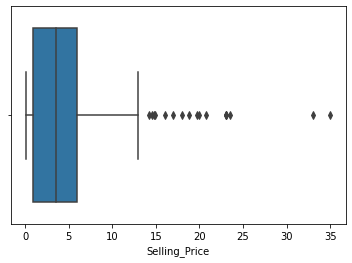

In [113]:
sns.boxplot(x=df2["Selling_Price"])

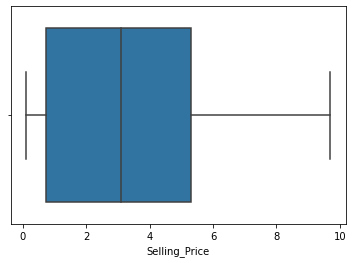

In [114]:
sns.boxplot(x=df4["Selling_Price"])

In [115]:
df5 = df4.dropna(axis=0)

In [116]:
df5.shape

(262, 13)

In [117]:
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression

In [119]:
X = preprocessing.scale(np.array(df5.drop(["Selling_Price","Owner","Car_Name"],axis=1)))
y = np.array(df5["Selling_Price"])

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


*Classiffier code was adapted from the code at https://github.com/krishnaik06/Car-Price-Prediction/blob/master/Untitled.ipynb*

In [125]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [126]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [127]:
rf = RandomForestRegressor()

In [128]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [129]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   1.3s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   44.2s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [130]:
rf_random.best_score_

-0.3454567932231039

In [131]:
predictions=rf_random.predict(X_test)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


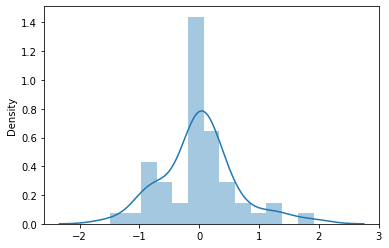

In [134]:
sns.distplot(y_test-predictions)

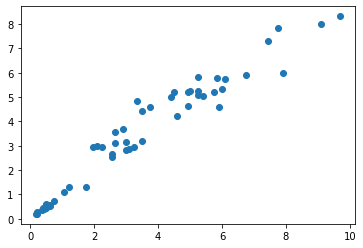

In [133]:
plt.scatter(y_test,predictions)

In [132]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.4225644697757015
MSE: 0.37657081451028673
RMSE: 0.6136536600642799
